In [2]:
import numpy as np
import pandas as pd
import random

In [5]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
df_obj=pd.DataFrame(dict_obj)
print(df_obj)
print(df_obj.groupby('key1').sum())
print(df_obj.groupby('key2').mean())
print(df_obj.groupby('key2').max())
print(type(df_obj.groupby('key1')))

  key1   key2  data1  data2
0    a    one      3      1
1    b    one      5      4
2    a    two      1      6
3    b  three      5      4
4    a    two      6      4
5    b    two      4      3
6    a    one      4      9
7    a  three      9      7
      data1  data2
key1              
a        23     27
b        14     11
          data1     data2
key2                     
one    4.000000  4.666667
three  7.000000  5.500000
two    3.666667  4.333333
      key1  data1  data2
key2                    
one      b      5      9
three    b      9      7
two      b      6      6
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [15]:
def peak_range(df:pd.DataFrame):
    return df.max()-df.min()

print(df_obj.groupby('key1').agg(peak_range))
print(df_obj.groupby('key1').agg(['mean','max','min']))
dict_mapping = {'data1':'mean',
                'data2':'max'}
print(df_obj.groupby('key1').agg(dict_mapping))

      data1  data2
key1              
a         8      8
b         1      1
         data1             data2        
          mean max min      mean max min
key1                                    
a     4.600000   9   1  5.400000   9   1
b     4.666667   5   4  3.666667   4   3
         data1  data2
key1                 
a     4.600000      9
b     4.666667      4


C:\Users\gdmmx\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [16]:
file_path='./starbucks_store_worldwide.csv'
df=pd.read_csv(file_path)
print(df.head(1))
print(df.info())

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 


In [18]:
group_data=df.groupby(by='Country')
print(group_data.size())

Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Length: 73, dtype: int64


In [20]:
country_count=group_data["Store Name"].count()
print(country_count["US"])
print(country_count["CN"])

13608
2734


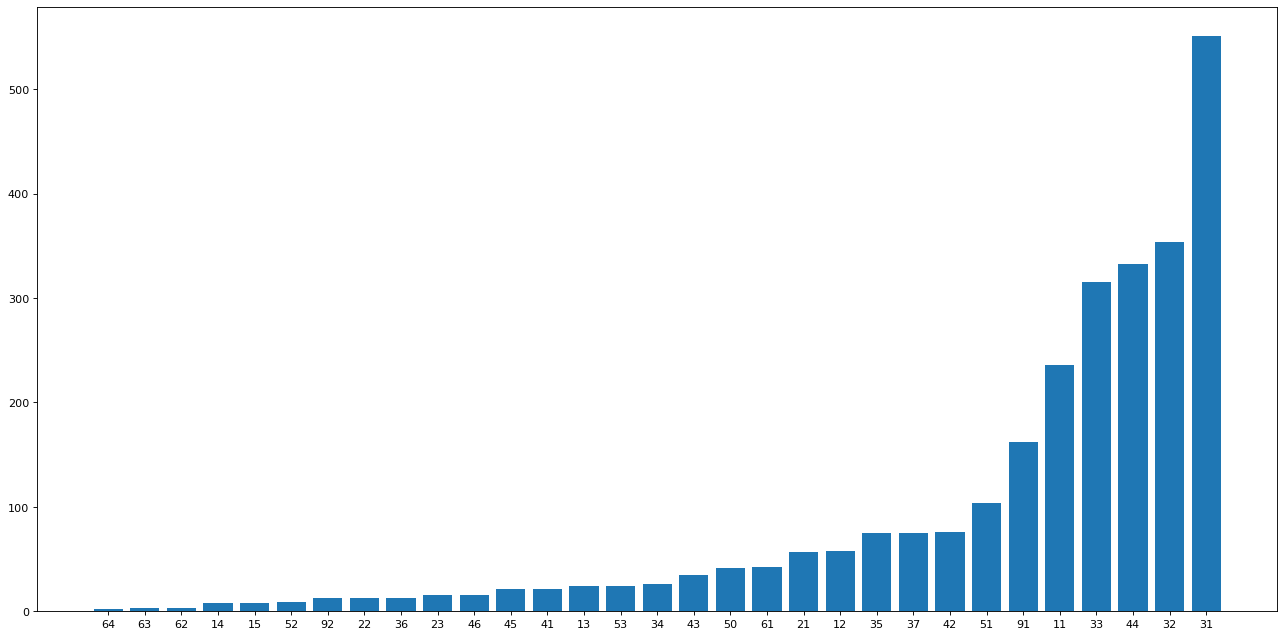

In [37]:
import matplotlib.pyplot as plt
country_cn=df[df['Country']=='CN']
china_province=country_cn.groupby(by='State/Province').count()['Brand'].sort_values()
#对中国数据进行按省分组后 每个省份数值的一个向量
plt.figure(figsize=(20,10),dpi=80)
plt.bar(china_province.index,china_province.values)
plt.show()


